# **TP1 - Naive Bayes Classifier / Linear, Quadratic and Regularized Discriminant Analysis**

-----
<br>

<center>Course: Advanced Machine Learning <br>
Lecturer: Sothea HAS, PhD
</center>


<div class="alert alert-block alert-success">
<b>Objective:</b> This practical session (TP) aims to familiarize you with the key assumptions of each introduced model. The first section is designed to test your understanding of the data and models, while the second section focuses on applying your knowledge to real-world datasets. Please read the instructions carefully and try to complete the tasks independently. If you get stuck, don’t hesitate to ask for help. Good luck!

1. Model Assumptions and Data Simulation: It's important to verify that any models should work well on the data that respect their assumptions.
- *Data Simulation*: Create datasets that either respect or violate the assumptions of each model, including addressing imbalance problems.
- *Model Implementation*: Put the models into action.
- *Model Evaluation*: Report the performance of the models using appropriate metrics.

2. Real Data Implementation: In real-world problems, things are more complicated because very often the assumptions of the model are often violated. We shall see this by exploring the following real datasets.
- *Real Datasets*: you may start with `Spam` dataset to reproduce the experimental results shown in the course, or explore [Heart Disease Dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset).
- *Preprocessing/Descriptive Analysis*: Understand the features and verify the assumptions (use correlation metrics, for example).
- *Implementation*: Apply the models to the datasets.
- *Evaluation*: Assess the performance of the models.

</div>

----------

## **1. Simulation**
- Write a function `simulateClassificationData(n=200, d=2, M = 2, method = "nbc")` that returns input-output observations with
    - observation size `n` ($200$ by default)
    - input $x_i$ are of dimension `d` ($2$ by default)
    - the target $y$ contains `M` classes taking values in $\{1,2,\dots,M\}$
    - and lastly, `method` defines the prefered method that is supposed to work well on this dataset. It should be an element of [`nbc`, `LDA`, `QDA`, `RDA`] (`nbc` by default).

*I set an example below, you can do it differently.*

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.datasets import make_spd_matrix
import string
  letters=ascii_lowercase

def simulateClassificationData(n=200, d=2, M=2, method="nbc", class_weights = None):
    """
    Generates a design matrix for classification that works well with Naive Bayes.

    Parameters:
    n (int): Number of samples.
    d (int): Number of features.
    M (int): Number of classes.
    method (str): Method name, default is "nbc" (Naive Bayes Classification).
    class_weights (arr): The proportion of each class. If `None`, the data is balanced.
    random_state (int): Random seed for repreoducing the result in random simulation.

    Returns:
    X (numpy.ndarray): Feature matrix.
    y (numpy.ndarray): Labels.
    """

    # Check if the class weight is given. If it's None, it's a balanced case.
    if class_weights is None:
        class_weights = np.ones(M)/M
    idx = np.random.multinomial(1, class_weights, size=n)
    n_class = [np.sum(idx[:,i]) for i in range(M)]

    # Generate data that prefers NBC model.
    if method == "nbc":
        b = np.random.randint(1,10, 1)
        x1 = np.random.poisson(b, size=(n_class[0], d//2))
        b = np.random.uniform(-2, 2, 2)
        x2 = np.random.normal(np.min(b), np.abs(np.max(b)), size=(n_class[0], d//2))
        X = np.column_stack([x1,x2])
        for i in range(1,M):
            b = np.random.randint(1,10, 1)
            x1 = np.random.poisson(b, size=(n_class[i], d//2))
            b = np.random.uniform(-2,2, 2)
            x2 = np.random.normal(np.min(b), np.abs(np.max(b)), size=(n_class[i], d//2))
            X = np.row_stack([X, np.column_stack([x1, x2])])
        y = np.repeat([str(i) for i in range(1,M+1)], n_class)

        """
        We can generate the Target variable as group in String
        y = np.repeat([str(i) for i in range(1,M+1)], n_class)

        """

    # Data that prefers LDA
    elif method == "lda":
        # generate parameters (means & covariances)
        mu = np.random.uniform(-5, 5, size=d)
        sigma0 = make_spd_matrix(n_dim=d)
        for i in range(M-1):
            mu = np.row_stack([mu, np.random.uniform(-5, 5, size=d)])

        # generate observations
        X = np.row_stack([np.random.multivariate_normal(mean=mu[i,:], cov=sigma0, size=int(n*class_weights[i])) for i in range(M)])
        y = np.concatenate([np.repeat(str(i), int(n*class_weights[i-1])) for i in range(1,M+1)])

    # Data that prefers QDA or RDA
    elif method in ["qda", "rda"]:
        # generate parameters (means & covariances)
        mu = np.random.uniform(-5, 5, size=d)
        sigma = [make_spd_matrix(n_dim=d)]
        for i in range(M-1):
            mu = np.row_stack([mu, np.random.uniform(-5, 5, size=d)])
            sigma.append(make_spd_matrix(n_dim=d))
        # generate observations
        X = np.row_stack([np.random.multivariate_normal(mean=mu[i,:], cov=sigma[i], size=int(n*class_weights[i])) for i in range(M)])
        y = np.concatenate([np.repeat(str(i), int(n*class_weights[i-1])) for i in range(1,M+1)])
    # If method is other than above, return value error.
    else:
        ValueError("method is either 'nbc', 'lda', 'qda' or 'rda'!")
    # Randomly shuffle the data
    id_shuffle = np.random.permutation(range(len(y)))
    return X[id_shuffle,:], y[id_shuffle].astype(object)

-------

### 1.1. Balanced datasets
**A.** With $(n,d,M)=(700,2,3)$ fixed and three different options for method in the list `['nbc', 'lda', 'qda']`, use the function above to generate three different datasets: `(X_nbc, y_nbc)`, `(X_lda, y_lda)`, and `(X_qda, y_qda)`, where `X` and `y` are different input-output pairs. An example is given below.

In [ ]:
# Set parameters
n, d, M = 700, 2, 3

# Set random seed for our data generation
np.random.seed(42)
X_nbc, y_nbc = simulateClassificationData(n, d, M, method="nbc")
"""
this is to generate the dataset to fit NBC method using the Simulation command above
"""
X_lda, y_lda = simulateClassificationData(n, d, M, method="lda")
"""
this is to generate the dataset to fit Linear Discriminant Analysis (LDA) method using the Simulation command above
"""
X_qda, y_qda = simulateClassificationData(n, d, M, method="qda")
"""
this is to generate the dataset to fit Quadratic Discriminant Analysis (QDA) method using the Simulation command above
"""

In [ ]:
X_nbc

array([[13.        , -1.52226822],
       [ 6.        , -1.34374663],
       [ 4.        , -1.7381837 ],
       ...,
       [10.        , -2.30482001],
       [ 6.        , -2.06186589],
       [ 4.        , -1.82175065]])

In [ ]:
y_nbc

array(['3', '2', '1', '1', '3', '2', '1', '2', '2', '1', '1', '1', '3',
       '1', '1', '1', '2', '1', '2', '3', '1', '2', '2', '3', '2', '2',
       '3', '3', '2', '2', '3', '2', '1', '3', '2', '3', '2', '1', '3',
       '3', '2', '2', '2', '3', '3', '2', '2', '3', '2', '1', '1', '3',
       '1', '1', '1', '1', '3', '3', '2', '3', '2', '2', '3', '2', '1',
       '1', '2', '3', '1', '1', '1', '2', '1', '2', '2', '3', '1', '2',
       '1', '3', '3', '2', '2', '2', '2', '3', '2', '2', '3', '1', '2',
       '1', '3', '1', '3', '3', '2', '3', '3', '2', '1', '2', '3', '2',
       '1', '2', '3', '2', '3', '1', '3', '2', '3', '2', '1', '2', '2',
       '1', '2', '2', '2', '1', '3', '2', '3', '3', '3', '2', '2', '3',
       '2', '3', '1', '3', '3', '3', '3', '2', '3', '2', '1', '2', '3',
       '2', '2', '2', '2', '3', '1', '1', '3', '3', '2', '2', '1', '1',
       '2', '2', '3', '2', '2', '3', '2', '1', '1', '3', '2', '1', '3',
       '1', '3', '3', '2', '1', '2', '1', '3', '1', '3', '1', '2

---------

**B.** Write the code to visualize the first $500$ observations from each dataset using scatterplots colored according to the classes of the target `y`. The remaining $200$ observations are treated as the testing data.

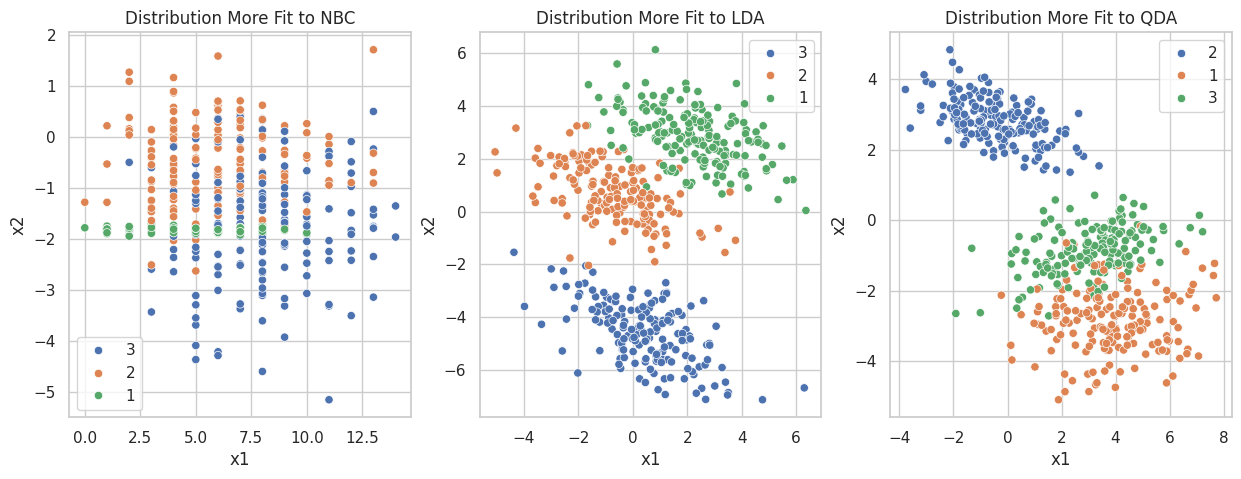

In [ ]:
# This is what to do in class
# Getting Train & Test Data

#1- Train & Test Data for NBC
X_train_nbc, y_train_nbc = X_nbc[:500,:], y_nbc[:500]
X_test_nbc, y_test_nbc = X_nbc[500:,:], y_nbc[500:]

#2- Train & Test Data for LDA
X_train_lda, y_train_lda = X_lda[:500,:], y_lda[:500]
X_test_lda, y_test_lda = X_lda[500:,:], y_lda[500:]

#3- Train & Test Data for QDA
X_train_qda, y_train_qda = X_qda[:500,:], y_qda[:500]
X_test_qda, y_test_qda = X_qda[500:,:], y_qda[500:]



import seaborn as sns
import matplotlib.pyplot as plt

# Setting Graphic Grid (1*3)
sns.set(style="whitegrid")
fig, axs=plt.subplots(1,3, figsize=(15,5)) #dividing the panel for our graph (by this time, we don't have graph yet but only coordinates)

# Plotting for NBC
sns.scatterplot(x=X_train_nbc[:,0], y=X_train_nbc[:,1], hue=y_train_nbc, ax=axs[0]) # need to explain this code==> this is to set the Scatterplot into Graph No. 1
# Need to decorate our scatterplot
axs[0].set_title("Distribution More Fit to NBC")
axs[0].set_xlabel("x1")
axs[0].set_ylabel("x2")
# plt.legend(title= "Species", loc= "upper left") Use to name the Legend

# Scatterplot for LDA Method
sns.scatterplot(x=X_train_lda[:,0], y=X_train_lda[:,1], hue=y_train_lda, ax=axs[1]) # need to explain this code==> this is to set the Scatterplot into Graph No. 2
# Need to decorate our scatterplot
axs[1].set_title("Distribution More Fit to LDA")
axs[1].set_xlabel("x1")
axs[1].set_ylabel("x2")
# plt.legend(title= "Species", loc= "upper left") Use to name the Legend

# Scatterplot for QDA Method
sns.scatterplot(x=X_train_qda[:,0], y=X_train_qda[:,1], hue=y_train_qda, ax=axs[2]) # need to explain this code==> this is to set the Scatterplot into Graph No. 3
# Need to decorate our scatterplot
axs[2].set_title("Distribution More Fit to QDA")
axs[2].set_xlabel("x1")
axs[2].set_ylabel("x2")
# plt.legend(title= "Species", loc= "upper left") Use to name the Legend
plt.show()





In this context
- NBC is fit with the data with distribution in Figure 1
- LDA is fit with the data with distribution in Figure 2
- QLA is fit with the data with distribution in Figure 2

-------

**C.** For now, work with `(X_nbc, y_nbc)` dataset.

**a.** Train `NBC`, `LDA` and `QDA` on the first $500$ observations. Report the *accuracies*, *precision*, *recall* and *f1-scaore* of the three models on the remaining $200$ testing points.

In [ ]:
# Practice NB Dataset

sns.set(style="white")
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score

#### Practice

# Train Model with NB Dataset
## NBC
nbc1=GaussianNB()  # Initiate the model
nbc1.fit(X_train_nbc, y_train_nbc)
y_hat_nbc1=nbc1.predict(X_test_nbc)
## LDA
lda1=LDA() # Initiate the model
lda1.fit(X_train_nbc, y_train_nbc)
y_hat_lda1=lda1.predict(X_test_nbc)
## QDA
qda1=QDA() # Initiate the model
qda1.fit(X_train_nbc, y_train_nbc)
y_hat_qda1=qda1.predict(X_test_nbc)


# Build Model is to capture the trend of Train Data, so the model is trying to base on Train Data. but When evaluate the Model, we use Test Data to judge the Model Performance


"""
In NBC we fit model using calculation of Density of each class 'Y'. If the high proportion lie to any 'Class', the model will judge that it is fall into that 'Class'
"""

# Evaluation Metrics
acc_nbc1=accuracy_score(y_test_nbc, y_hat_nbc1)
acc_lda1=accuracy_score(y_test_nbc, y_hat_lda1)
acc_qda1=accuracy_score(y_test_nbc, y_hat_qda1)

prec_nbc1=precision_score(y_test_nbc, y_hat_nbc1, average='macro')
prec_lda1=precision_score(y_test_nbc, y_hat_lda1, average='macro')
prec_qda1=precision_score(y_test_nbc, y_hat_qda1, average='macro')

"""
The difference between average = Micro & Macro is that
"""

rec_nbc1=recall_score(y_test_nbc, y_hat_nbc1, average='macro')
rec_lda1=recall_score(y_test_nbc, y_hat_lda1, average='macro')
rec_qda1=recall_score(y_test_nbc, y_hat_qda1, average='macro')

f1_nbc1=f1_score(y_test_nbc, y_hat_nbc1, average='macro')
f1_lda1=f1_score(y_test_nbc, y_hat_lda1, average='macro')
f1_qda1=f1_score(y_test_nbc, y_hat_qda1, average='macro')

# Confusion Matrix
cf_mat_nbc1=confusion_matrix(y_test_nbc, y_hat_nbc1, normalize='true')
cf_mat_lda1=confusion_matrix(y_test_nbc, y_hat_lda1, normalize='true')
cf_mat_qda1=confusion_matrix(y_test_nbc, y_hat_qda1, normalize='true')

ConfusionMatrixDisplay(cf_mat_nbc1).plot()
ConfusionMatrixDisplay(cf_mat_lda1).plot()
ConfusionMatrixDisplay(cf_mat_qda1).plot()

# Build Grid Display for Confusion Matrix
import matplotlib.pyplot as plt
fix, axn=plt.subplots(1,3, figsize=(15,5))

# NBC
ax=ConfusionMatrixDisplay(cf_mat_nbc1).plot(ax=axn[0])
axn[0].set_title(f"NBC Confusion Matrix, acc: {acc_nbc1}")

# LDA
ax=ConfusionMatrixDisplay(cf_mat_lda1).plot(ax=axn[1])
axn[1].set_title(f"NBC Confusion Matrix, acc: {acc_lda1}")

# QDA
ax=ConfusionMatrixDisplay(cf_mat_qda1).plot(ax=axn[2])
axn[2].set_title(f"NBC Confusion Matrix, acc: {acc_qda1}")
#plt.show()



# Value
import pandas as pd
df_value1 = pd.DataFrame({
    'Model': ['NBC', 'LDA', 'QDA'],
    'Recall': [rec_nbc1, rec_lda1, rec_qda1],
    'Precision': [prec_nbc1, prec_lda1, prec_qda1],
    'F1-Score': [f1_nbc1, f1_lda1, f1_qda1],
    'Accuracy': [acc_nbc1, acc_lda1, acc_qda1]
})

In [ ]:
print(df_value1)

  Model    Recall  Precision  F1-Score  Accuracy
0   NBC  0.831125   0.831003  0.824050     0.835
1   LDA  0.639893   0.634448  0.636846     0.635
2   QDA  0.820832   0.818865  0.814520     0.825


**b.** Draw the decision boundary with the testing data of the three models on the `(X_nbc, y_nbc)` dataset.

In [ ]:
# Practice NBC Dataset

from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap

# Color
color_tab = sns.color_palette("Set2")
palette = {str(i): color_tab[i-1] for i in range(1,M+1)}

conf_mat = {
    "NBC": cf_mat_nbc1,
    "LDA": cf_mat_lda1,
    "QDA": cf_mat_qda1
}

models = [nbc1, lda1, qda1]
def plot_decision_boundary(X, y,
                           models = list,
                           n_x = 30,
                           n_y = 30,
                           model_names = ['NBC', 'LDA', 'QDA']):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, n_x),
                         np.arange(y_min, y_max, n_y))

    fig, axes = plt.subplots(1, 3, figsize=(8, 3))
    keys = list(conf_mat.keys())
    for idx, model in enumerate(models):
        ax = axes[idx]
        disp = DecisionBoundaryDisplay.from_estimator(
            model, X, response_method='predict', ax=ax, cmap=ListedColormap(palette.values()), alpha=0.5)
        sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette=palette, ax=ax)
        ax.set_title(model_names[idx])
        ax.set_xlabel("x1")
        if idx == 0:
            ax.set_ylabel("x2")
        ax.set_title(f"{model_names[idx]} with acc = {(conf_mat[keys[idx]].diagonal().sum() / conf_mat[keys[idx]].sum()).round(3)}")
    plt.tight_layout()
    plt.show()


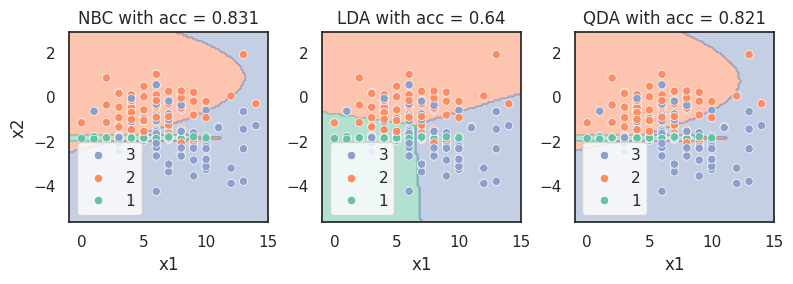

In [ ]:
plot_decision_boundary(X_test_nbc, y_test_nbc, models=models, model_names=["NBC", "LDA", "QDA"])

------

**D.** Do the same with the other two datasets (LDA & QDA Datasets). Make some comments on the results: Are the results reasonable? Explain.

D1: LDA Dataset

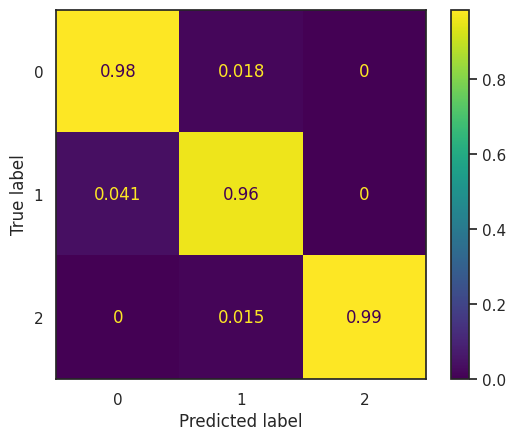

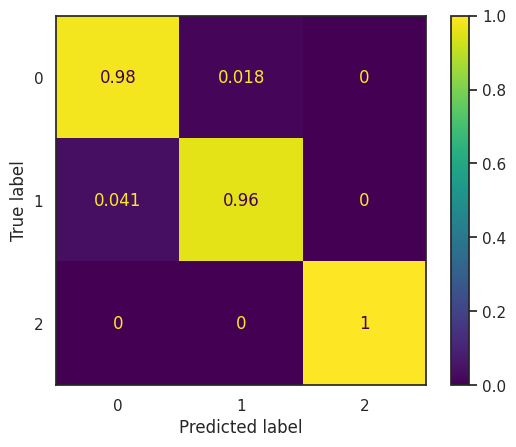

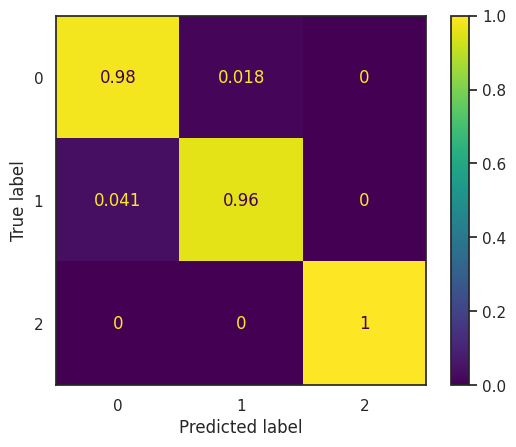

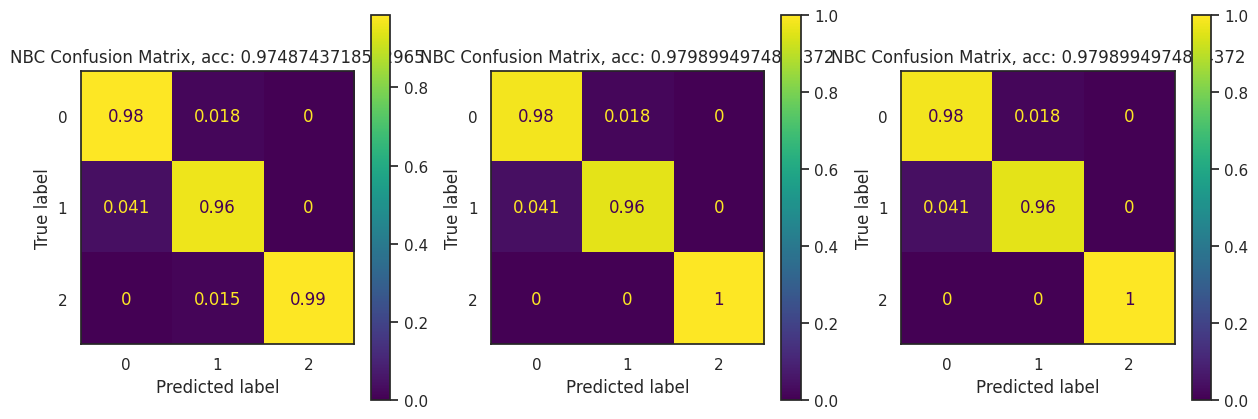

In [ ]:
# Practice LDA Dataset

sns.set(style="white")
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score

#### Practice

# Train Model with NB Dataset
## NBC
nbc1=GaussianNB()  # Initiate the model
nbc1.fit(X_train_lda, y_train_lda)
y_hat_nbc1=nbc1.predict(X_test_lda)

## LDA
lda1=LDA() # Initiate the model
lda1.fit(X_train_lda, y_train_lda)
y_hat_lda1=lda1.predict(X_test_lda)

## QDA
qda1=QDA() # Initiate the model
qda1.fit(X_train_lda, y_train_lda)
y_hat_qda1=qda1.predict(X_test_lda)


# Build Model is to capture the trend of Train Data, so the model is trying to base on Train Data. but When evaluate the Model, we use Test Data to judge the Model Performance


"""
In NBC we fit model using calculation of Density of each class 'Y'. If the high proportion lie to any 'Class', the model will judge that it is fall into that 'Class'
"""

# Evaluation Metrics
acc_nbc1=accuracy_score(y_test_lda, y_hat_nbc1)
acc_lda1=accuracy_score(y_test_lda, y_hat_lda1)
acc_qda1=accuracy_score(y_test_lda, y_hat_qda1)

prec_nbc1=precision_score(y_test_lda, y_hat_nbc1, average='macro')
prec_lda1=precision_score(y_test_lda, y_hat_lda1, average='macro')
prec_qda1=precision_score(y_test_lda, y_hat_qda1, average='macro')

"""
The difference between average = Micro & Macro is that
"""

rec_nbc1=recall_score(y_test_lda, y_hat_nbc1, average='macro')
rec_lda1=recall_score(y_test_lda, y_hat_lda1, average='macro')
rec_qda1=recall_score(y_test_lda, y_hat_qda1, average='macro')

f1_nbc1=f1_score(y_test_lda, y_hat_nbc1, average='macro')
f1_lda1=f1_score(y_test_lda, y_hat_lda1, average='macro')
f1_qda1=f1_score(y_test_lda, y_hat_qda1, average='macro')

# Confusion Matrix
cf_mat_nbc1=confusion_matrix(y_test_lda, y_hat_nbc1, normalize='true')
cf_mat_lda1=confusion_matrix(y_test_lda, y_hat_lda1, normalize='true')
cf_mat_qda1=confusion_matrix(y_test_lda, y_hat_qda1, normalize='true')

ConfusionMatrixDisplay(cf_mat_nbc1).plot()
ConfusionMatrixDisplay(cf_mat_lda1).plot()
ConfusionMatrixDisplay(cf_mat_qda1).plot()

# Build Grid Display for Confusion Matrix
import matplotlib.pyplot as plt
fix, axn=plt.subplots(1,3, figsize=(15,5))

# NBC
ax=ConfusionMatrixDisplay(cf_mat_nbc1).plot(ax=axn[0])
axn[0].set_title(f"NBC Confusion Matrix, acc: {acc_nbc1}")

# LDA
ax=ConfusionMatrixDisplay(cf_mat_lda1).plot(ax=axn[1])
axn[1].set_title(f"NBC Confusion Matrix, acc: {acc_lda1}")

# QDA
ax=ConfusionMatrixDisplay(cf_mat_qda1).plot(ax=axn[2])
axn[2].set_title(f"NBC Confusion Matrix, acc: {acc_qda1}")
#plt.show()



# Value
import pandas as pd
df_value1 = pd.DataFrame({
    'Model': ['NBC', 'LDA', 'QDA'],
    'Recall': [rec_nbc1, rec_lda1, rec_qda1],
    'Precision': [prec_nbc1, prec_lda1, prec_qda1],
    'F1-Score': [f1_nbc1, f1_lda1, f1_qda1],
    'Accuracy': [acc_nbc1, acc_lda1, acc_qda1]
})

In [ ]:
# Value
import pandas as pd
df_value1 = pd.DataFrame({
    'Model': ['NBC', 'LDA', 'QDA'],
    'Recall': [rec_nbc1, rec_lda1, rec_qda1],
    'Precision': [prec_nbc1, prec_lda1, prec_qda1],
    'F1-Score': [f1_nbc1, f1_lda1, f1_qda1],
    'Accuracy': [acc_nbc1, acc_lda1, acc_qda1]
})

In [ ]:
print(df_value1)

  Model    Recall  Precision  F1-Score  Accuracy
0   NBC  0.975737   0.973918  0.974699  0.974874
1   LDA  0.980639   0.978421  0.979373  0.979899
2   QDA  0.980639   0.978421  0.979373  0.979899


In [ ]:
# Practice LDA Dataset

from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap

# Color
color_tab = sns.color_palette("Set2")
palette = {str(i): color_tab[i-1] for i in range(1,M+1)}

conf_mat = {
    "NBC": cf_mat_nbc1,
    "LDA": cf_mat_lda1,
    "QDA": cf_mat_qda1
}

models = [nbc1, lda1, qda1]
def plot_decision_boundary(X, y,
                           models = list,
                           n_x = 30,
                           n_y = 30,
                           model_names = ['NBC', 'LDA', 'QDA']):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, n_x),
                         np.arange(y_min, y_max, n_y))

    fig, axes = plt.subplots(1, 3, figsize=(8, 3))
    keys = list(conf_mat.keys())
    for idx, model in enumerate(models):
        ax = axes[idx]
        disp = DecisionBoundaryDisplay.from_estimator(
            model, X, response_method='predict', ax=ax, cmap=ListedColormap(palette.values()), alpha=0.5)
        sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette=palette, ax=ax)
        ax.set_title(model_names[idx])
        ax.set_xlabel("x1")
        if idx == 0:
            ax.set_ylabel("x2")
        ax.set_title(f"{model_names[idx]} with acc = {(conf_mat[keys[idx]].diagonal().sum() / conf_mat[keys[idx]].sum()).round(3)}")
    plt.tight_layout()
    plt.show()


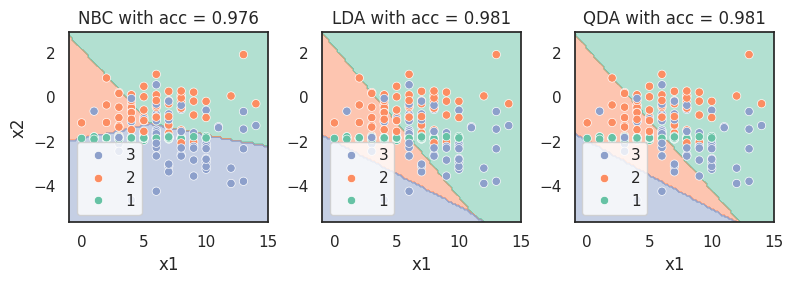

In [ ]:
plot_decision_boundary(X_test_nbc, y_test_nbc, models=models, model_names=["NBC", "LDA", "QDA"])

D2: With QDA Dataset

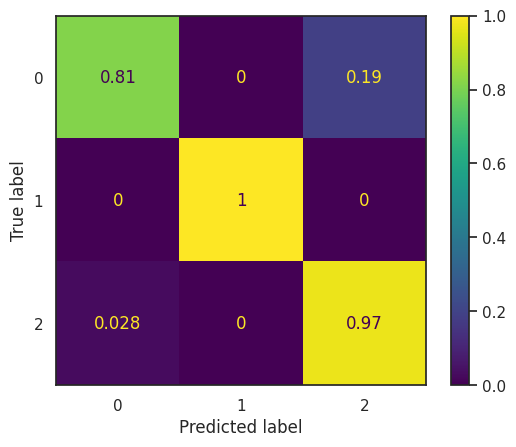

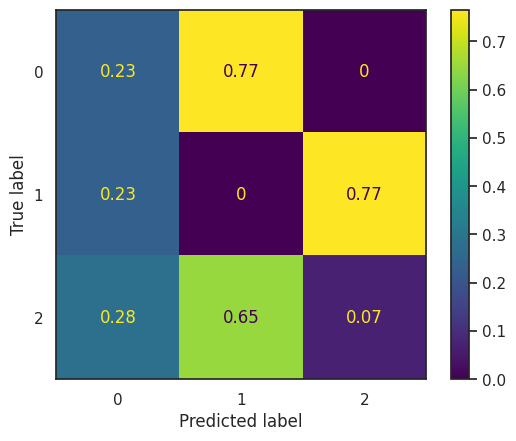

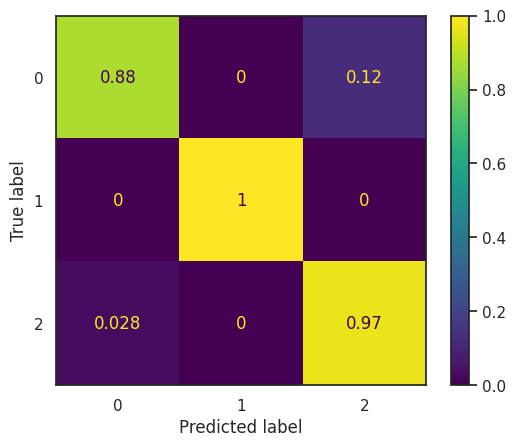

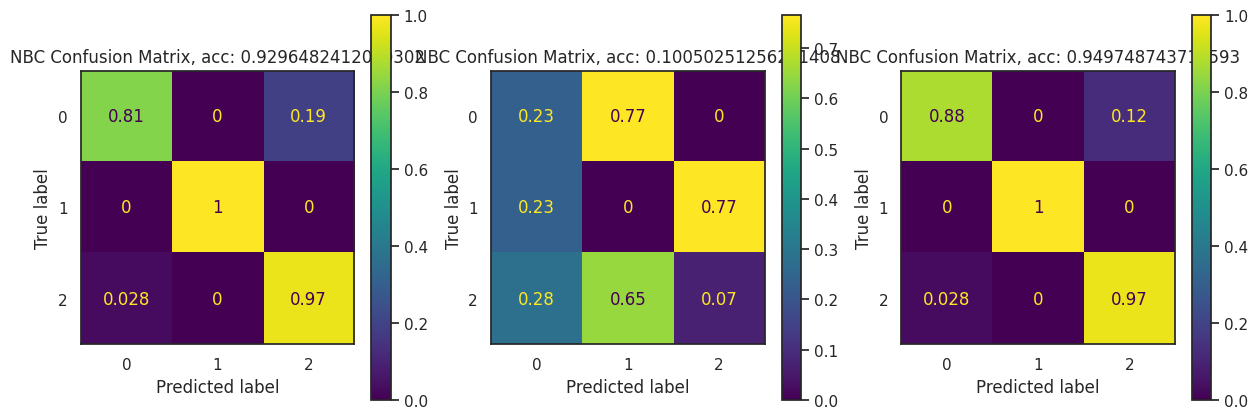

In [ ]:
# Practice QDA

sns.set(style="white")
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score

#### Practice

# Train Model with NB Dataset
## NBC
nbc1=GaussianNB()  # Initiate the model
nbc1.fit(X_train_qda, y_train_qda)
y_hat_nbc1=nbc1.predict(X_test_qda)
## LDA
lda1=LDA() # Initiate the model
lda1.fit(X_train_qda, y_train_nbc)
y_hat_lda1=lda1.predict(X_test_qda)
## QDA
qda1=QDA() # Initiate the model
qda1.fit(X_train_qda, y_train_qda)
y_hat_qda1=qda1.predict(X_test_qda)


# Build Model is to capture the trend of Train Data, so the model is trying to base on Train Data. but When evaluate the Model, we use Test Data to judge the Model Performance


"""
In NBC we fit model using calculation of Density of each class 'Y'. If the high proportion lie to any 'Class', the model will judge that it is fall into that 'Class'
"""

# Evaluation Metrics
acc_nbc1=accuracy_score(y_test_qda, y_hat_nbc1)
acc_lda1=accuracy_score(y_test_qda, y_hat_lda1)
acc_qda1=accuracy_score(y_test_qda, y_hat_qda1)

prec_nbc1=precision_score(y_test_qda, y_hat_nbc1, average='macro')
prec_lda1=precision_score(y_test_qda, y_hat_lda1, average='macro')
prec_qda1=precision_score(y_test_qda, y_hat_qda1, average='macro')

"""
The difference between average = Micro & Macro is that
"""

rec_nbc1=recall_score(y_test_qda, y_hat_nbc1, average='macro')
rec_lda1=recall_score(y_test_qda, y_hat_lda1, average='macro')
rec_qda1=recall_score(y_test_qda, y_hat_qda1, average='macro')

f1_nbc1=f1_score(y_test_qda, y_hat_nbc1, average='macro')
f1_lda1=f1_score(y_test_qda, y_hat_lda1, average='macro')
f1_qda1=f1_score(y_test_qda, y_hat_qda1, average='macro')

# Confusion Matrix
cf_mat_nbc1=confusion_matrix(y_test_qda, y_hat_nbc1, normalize='true')
cf_mat_lda1=confusion_matrix(y_test_qda, y_hat_lda1, normalize='true')
cf_mat_qda1=confusion_matrix(y_test_qda, y_hat_qda1, normalize='true')

ConfusionMatrixDisplay(cf_mat_nbc1).plot()
ConfusionMatrixDisplay(cf_mat_lda1).plot()
ConfusionMatrixDisplay(cf_mat_qda1).plot()

# Build Grid Display for Confusion Matrix
import matplotlib.pyplot as plt
fix, axn=plt.subplots(1,3, figsize=(15,5))

# NBC
ax=ConfusionMatrixDisplay(cf_mat_nbc1).plot(ax=axn[0])
axn[0].set_title(f"NBC Confusion Matrix, acc: {acc_nbc1}")

# LDA
ax=ConfusionMatrixDisplay(cf_mat_lda1).plot(ax=axn[1])
axn[1].set_title(f"NBC Confusion Matrix, acc: {acc_lda1}")

# QDA
ax=ConfusionMatrixDisplay(cf_mat_qda1).plot(ax=axn[2])
axn[2].set_title(f"NBC Confusion Matrix, acc: {acc_qda1}")
#plt.show()

# Value
import pandas as pd
df_value1 = pd.DataFrame({
    'Model': ['NBC', 'LDA', 'QDA'],
    'Recall': [rec_nbc1, rec_lda1, rec_qda1],
    'Precision': [prec_nbc1, prec_lda1, prec_qda1],
    'F1-Score': [f1_nbc1, f1_lda1, f1_qda1],
    'Accuracy': [acc_nbc1, acc_lda1, acc_qda1]
})

In [ ]:
print(df_value1)

  Model    Recall  Precision  F1-Score  Accuracy
0   NBC  0.928110   0.938272  0.929750  0.929648
1   LDA  0.101599   0.130864  0.114386  0.100503
2   QDA  0.948944   0.953874  0.950155  0.949749


In [ ]:
# Practice QDA Dataset

from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap

# Color
color_tab = sns.color_palette("Set2")
palette = {str(i): color_tab[i-1] for i in range(1,M+1)}

conf_mat = {
    "NBC": cf_mat_nbc1,
    "LDA": cf_mat_lda1,
    "QDA": cf_mat_qda1
}

models = [nbc1, lda1, qda1]
def plot_decision_boundary(X, y,
                           models = list,
                           n_x = 30,
                           n_y = 30,
                           model_names = ['NBC', 'LDA', 'QDA']):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, n_x),
                         np.arange(y_min, y_max, n_y))

    fig, axes = plt.subplots(1, 3, figsize=(8, 3))
    keys = list(conf_mat.keys())
    for idx, model in enumerate(models):
        ax = axes[idx]
        disp = DecisionBoundaryDisplay.from_estimator(
            model, X, response_method='predict', ax=ax, cmap=ListedColormap(palette.values()), alpha=0.5)
        sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette=palette, ax=ax)
        ax.set_title(model_names[idx])
        ax.set_xlabel("x1")
        if idx == 0:
            ax.set_ylabel("x2")
        ax.set_title(f"{model_names[idx]} with acc = {(conf_mat[keys[idx]].diagonal().sum() / conf_mat[keys[idx]].sum()).round(3)}")
    plt.tight_layout()
    plt.show()


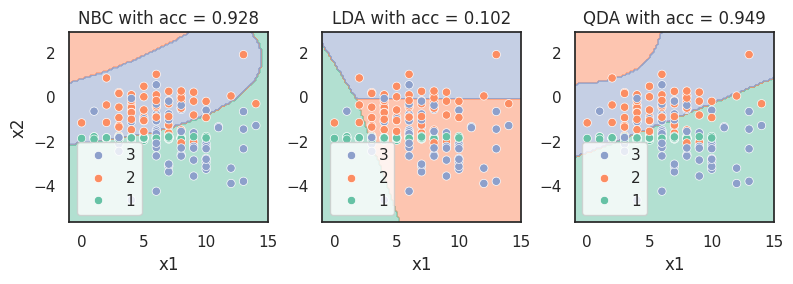

In [ ]:
plot_decision_boundary(X_test_nbc, y_test_nbc, models=models, model_names=["NBC", "LDA", "QDA"])

> Your comments:

--------

### 1.2. Imbalanced datasets

Now, we will work with imbalanced simulated datasets. The goal is to identify problems associated with imbalanced datasets and to propose possible solutions we have studied so far.

**A.** With the same options as in the balanced case, but adding an additional option of `class_weights = [0.2, 0.15, 0.65]`, generate other three imbalanced datasets. An example is provided below.

In [ ]:
weights = [0.2, 0.15, 0.65] #[0.2, 0.15, 0.65]
np.random.seed(42)
X_nbc, y_nbc = simulateClassificationData(n, d, M, method="nbc", class_weights=weights)
X_lda, y_lda = simulateClassificationData(n, d, M, method="lda", class_weights=weights)
X_qda, y_qda = simulateClassificationData(n, d, M, method="qda", class_weights=weights)

"""
#1- Train & Test Data for NBC
X_train_nbc, y_train_nbc = X_nbc[:500,:], y_nbc[:500]
X_nbc, y_test_nbc = X_nbc[500:,:], y_nbc[500:]

#2- Train & Test Data for LDA
X_train_lda, y_train_lda = X_lda[:500,:], y_lda[:500]
X_test_lda, y_test_lda = X_lda[500:,:], y_lda[500:]

#3- Train & Test Data for QDA
X_train_qda, y_train_qda = X_qda[:500,:], y_qda[:500]
X_test_qda, y_test_qda = X_qda[500:,:], y_qda[500:]

"""


'\n#1- Train & Test Data for NBC\nX_train_nbc, y_train_nbc = X_nbc[:500,:], y_nbc[:500]\nX_nbc, y_test_nbc = X_nbc[500:,:], y_nbc[500:]\n\n#2- Train & Test Data for LDA\nX_train_lda, y_train_lda = X_lda[:500,:], y_lda[:500]\nX_test_lda, y_test_lda = X_lda[500:,:], y_lda[500:]\n\n#3- Train & Test Data for QDA\nX_train_qda, y_train_qda = X_qda[:500,:], y_qda[:500]\nX_test_qda, y_test_qda = X_qda[500:,:], y_qda[500:]\n\n'

A: Bar Graph for Dataset

TypeError: Cannot pass values for both `x` and `y`.

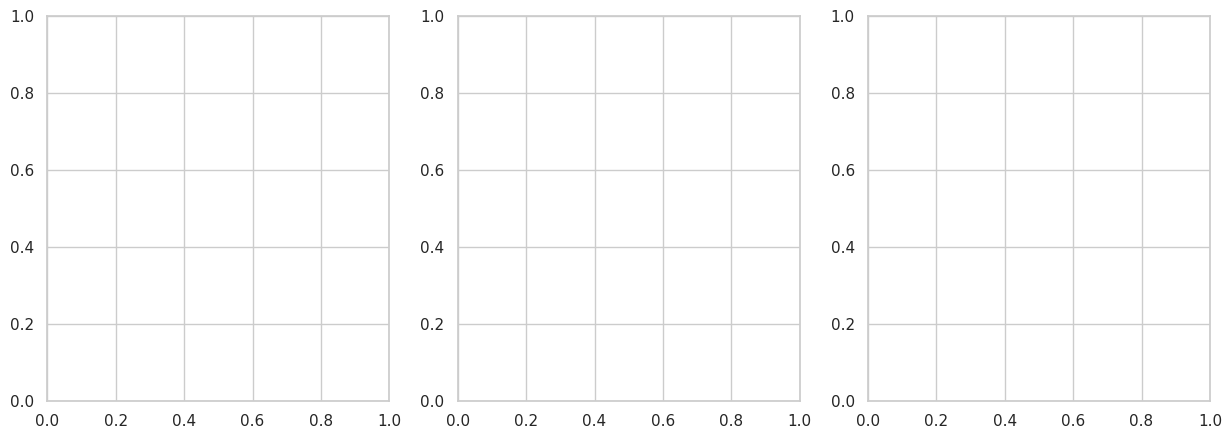

In [ ]:
# Practice
# Setting Graphic Grid (1*3)
sns.set(style="whitegrid")
fig, axs=plt.subplots(1,3, figsize=(15,5)) #dividing the panel for our graph (by this time, we don't have graph yet but only coordinates)

# Plotting for NBC
sns.countplot(x=y_nbc, hue=y_nbc, ax=axs[0], order=['1','2','3'], pallete=pallete) # need to explain this code==> this is to set the Scatterplot into Graph No. 1
# Need to decorate our scatterplot
for container in axes[0].containers:
    axs[0].bar_label(container)
axs[0].set_title("Distribution More Fit to NBC")
axs[0].set_xlabel("x1")
axs[0].set_ylabel("x2")
# plt.legend(title= "Species", loc= "upper left") Use to name the Legend


# Scatterplot for LDA Method
sns.countplot(x=y_lda[:,0], y=y_lda[:,1], hue=y_lda, ax=axs[1]) # need to explain this code==> this is to set the Scatterplot into Graph No. 2
# Need to decorate our scatterplot
axs[1].set_title("Distribution More Fit to LDA")
axs[1].set_xlabel("x1")
axs[1].set_ylabel("x2")
# plt.legend(title= "Species", loc= "upper left") Use to name the Legend


# Scatterplot for QDA Method
sns.countplot(x=y_qda[:,0], y=y_qda[:,1], hue=y_qda, ax=axs[2]) # need to explain this code==> this is to set the Scatterplot into Graph No. 3
# Need to decorate our scatterplot
axs[2].set_title("Distribution More Fit to QDA")
axs[2].set_xlabel("x1")
axs[2].set_ylabel("x2")
# plt.legend(title= "Species", loc= "upper left") Use to name the Legend
plt.show()



**a.** Create the countplots and scatterplots for the three simulated datasets.

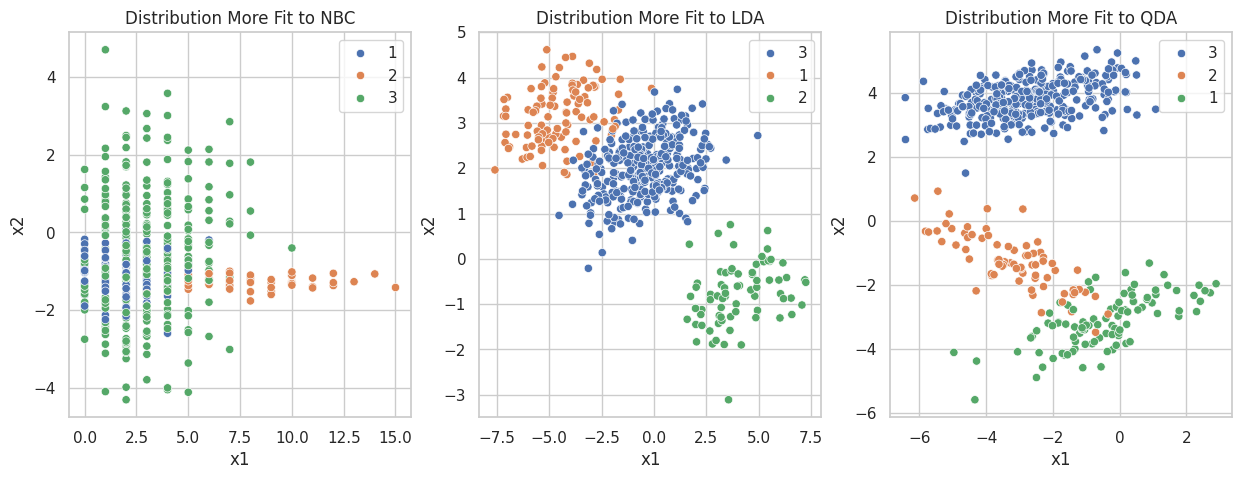

In [ ]:
# Practice
# Setting Graphic Grid (1*3)
sns.set(style="whitegrid")
fig, axs=plt.subplots(1,3, figsize=(15,5)) #dividing the panel for our graph (by this time, we don't have graph yet but only coordinates)

# Plotting for NBC
sns.scatterplot(x=X_train_nbc[:,0], y=X_train_nbc[:,1], hue=y_train_nbc, ax=axs[0]) # need to explain this code==> this is to set the Scatterplot into Graph No. 1
# Need to decorate our scatterplot
axs[0].set_title("Distribution More Fit to NBC")
axs[0].set_xlabel("x1")
axs[0].set_ylabel("x2")
# plt.legend(title= "Species", loc= "upper left") Use to name the Legend

# Scatterplot for LDA Method
sns.scatterplot(x=X_train_lda[:,0], y=X_train_lda[:,1], hue=y_train_lda, ax=axs[1]) # need to explain this code==> this is to set the Scatterplot into Graph No. 2
# Need to decorate our scatterplot
axs[1].set_title("Distribution More Fit to LDA")
axs[1].set_xlabel("x1")
axs[1].set_ylabel("x2")
# plt.legend(title= "Species", loc= "upper left") Use to name the Legend

# Scatterplot for QDA Method
sns.scatterplot(x=X_train_qda[:,0], y=X_train_qda[:,1], hue=y_train_qda, ax=axs[2]) # need to explain this code==> this is to set the Scatterplot into Graph No. 3
# Need to decorate our scatterplot
axs[2].set_title("Distribution More Fit to QDA")
axs[2].set_xlabel("x1")
axs[2].set_ylabel("x2")
# plt.legend(title= "Species", loc= "upper left") Use to name the Legend
plt.show()



**b.** Compute the performance metrics (recall, precision, f1-score,accuract) on imbalanced `nbc` dataset.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


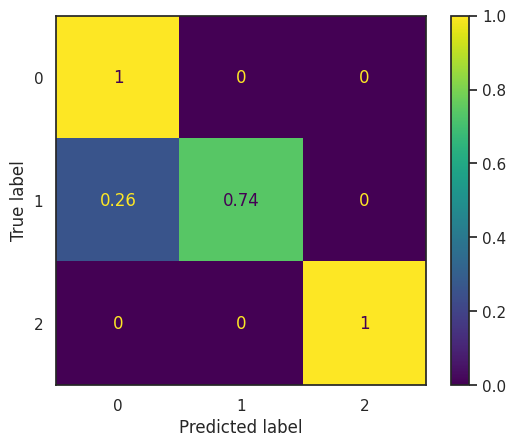

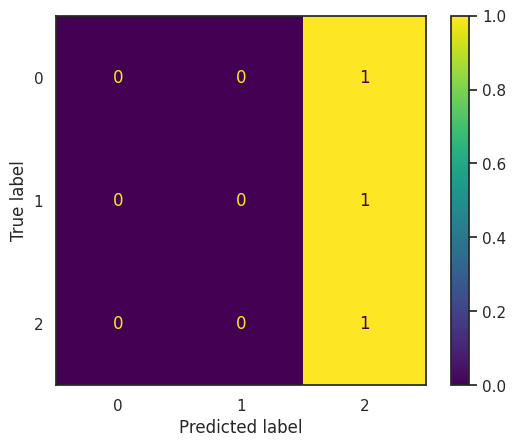

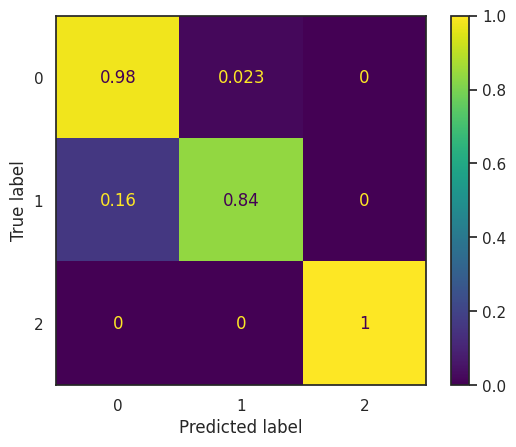

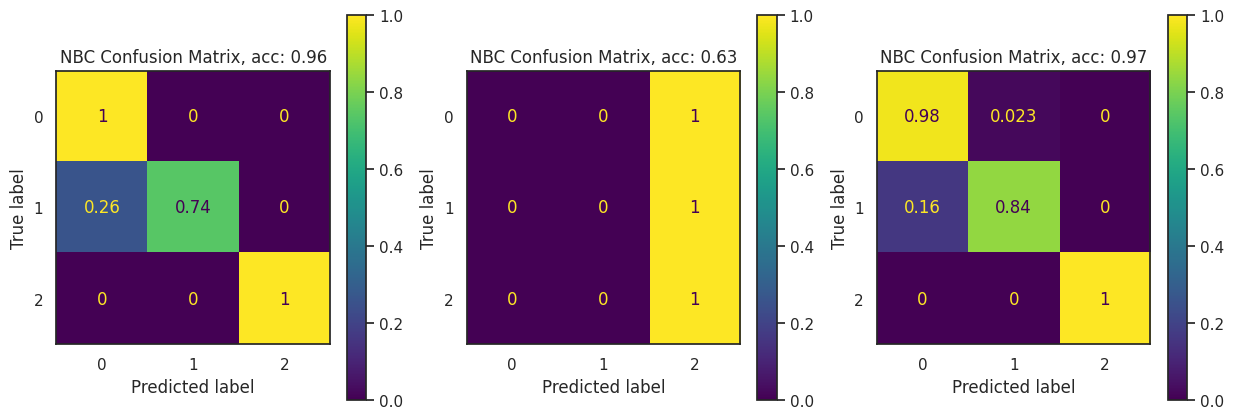

In [ ]:
# Practice Imbalance Data

sns.set(style="white")
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score

#### Practice

# Train Model with NB Dataset
## NBC
nbc1=GaussianNB()  # Initiate the model
nbc1.fit(X_qda, y_qda)
y_hat_nbc1=nbc1.predict(X_test_qda)
## LDA
lda1=LDA() # Initiate the model
lda1.fit(X_train_qda, y_train_nbc)
y_hat_lda1=lda1.predict(X_test_qda)
## QDA
qda1=QDA() # Initiate the model
qda1.fit(X_train_qda, y_train_qda)
y_hat_qda1=qda1.predict(X_test_qda)


# Build Model is to capture the trend of Train Data, so the model is trying to base on Train Data. but When evaluate the Model, we use Test Data to judge the Model Performance


"""
In NBC we fit model using calculation of Density of each class 'Y'. If the high proportion lie to any 'Class', the model will judge that it is fall into that 'Class'
"""

# Evaluation Metrics
acc_nbc1=accuracy_score(y_test_qda, y_hat_nbc1)
acc_lda1=accuracy_score(y_test_qda, y_hat_lda1)
acc_qda1=accuracy_score(y_test_qda, y_hat_qda1)

prec_nbc1=precision_score(y_test_qda, y_hat_nbc1, average='macro')
prec_lda1=precision_score(y_test_qda, y_hat_lda1, average='macro')
prec_qda1=precision_score(y_test_qda, y_hat_qda1, average='macro')

"""
The difference between average = Micro & Macro is that
"""

rec_nbc1=recall_score(y_test_qda, y_hat_nbc1, average='macro')
rec_lda1=recall_score(y_test_qda, y_hat_lda1, average='macro')
rec_qda1=recall_score(y_test_qda, y_hat_qda1, average='macro')

f1_nbc1=f1_score(y_test_qda, y_hat_nbc1, average='macro')
f1_lda1=f1_score(y_test_qda, y_hat_lda1, average='macro')
f1_qda1=f1_score(y_test_qda, y_hat_qda1, average='macro')

# Confusion Matrix
cf_mat_nbc1=confusion_matrix(y_test_qda, y_hat_nbc1, normalize='true')
cf_mat_lda1=confusion_matrix(y_test_qda, y_hat_lda1, normalize='true')
cf_mat_qda1=confusion_matrix(y_test_qda, y_hat_qda1, normalize='true')

ConfusionMatrixDisplay(cf_mat_nbc1).plot()
ConfusionMatrixDisplay(cf_mat_lda1).plot()
ConfusionMatrixDisplay(cf_mat_qda1).plot()

# Build Grid Display for Confusion Matrix
import matplotlib.pyplot as plt
fix, axn=plt.subplots(1,3, figsize=(15,5))

# NBC
ax=ConfusionMatrixDisplay(cf_mat_nbc1).plot(ax=axn[0])
axn[0].set_title(f"NBC Confusion Matrix, acc: {acc_nbc1}")

# LDA
ax=ConfusionMatrixDisplay(cf_mat_lda1).plot(ax=axn[1])
axn[1].set_title(f"NBC Confusion Matrix, acc: {acc_lda1}")

# QDA
ax=ConfusionMatrixDisplay(cf_mat_qda1).plot(ax=axn[2])
axn[2].set_title(f"NBC Confusion Matrix, acc: {acc_qda1}")
#plt.show()

# Value
import pandas as pd
df_value1 = pd.DataFrame({
    'Model': ['NBC', 'LDA', 'QDA'],
    'Recall': [rec_nbc1, rec_lda1, rec_qda1],
    'Precision': [prec_nbc1, prec_lda1, prec_qda1],
    'F1-Score': [f1_nbc1, f1_lda1, f1_qda1],
    'Accuracy': [acc_nbc1, acc_lda1, acc_qda1]
})

In [ ]:
print(df_value1)

  Model    Recall  Precision  F1-Score  Accuracy
0   NBC  0.913978   0.947712  0.922248      0.96
1   LDA  0.333333   0.210000  0.257669      0.63
2   QDA  0.938485   0.952193  0.943295      0.97


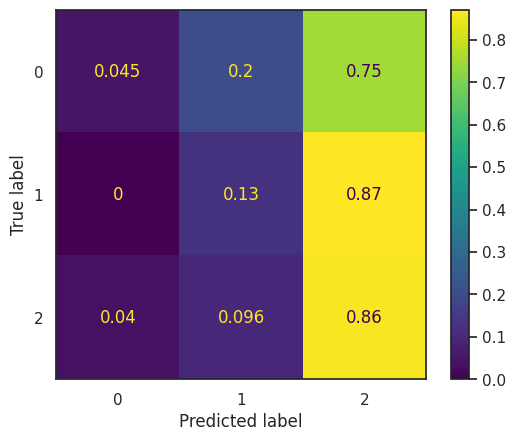

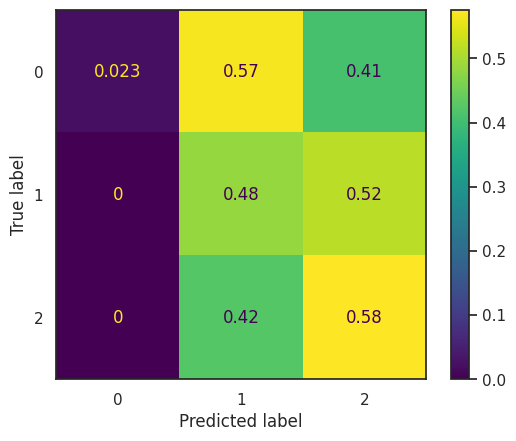

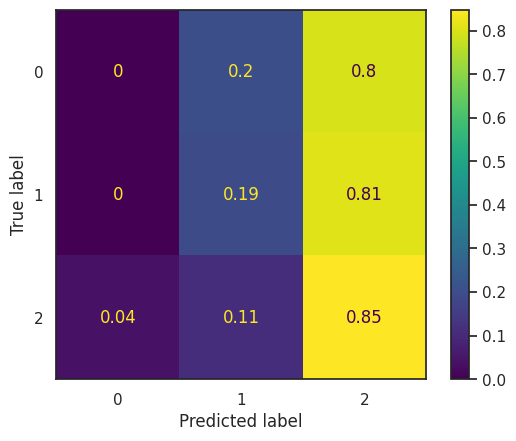

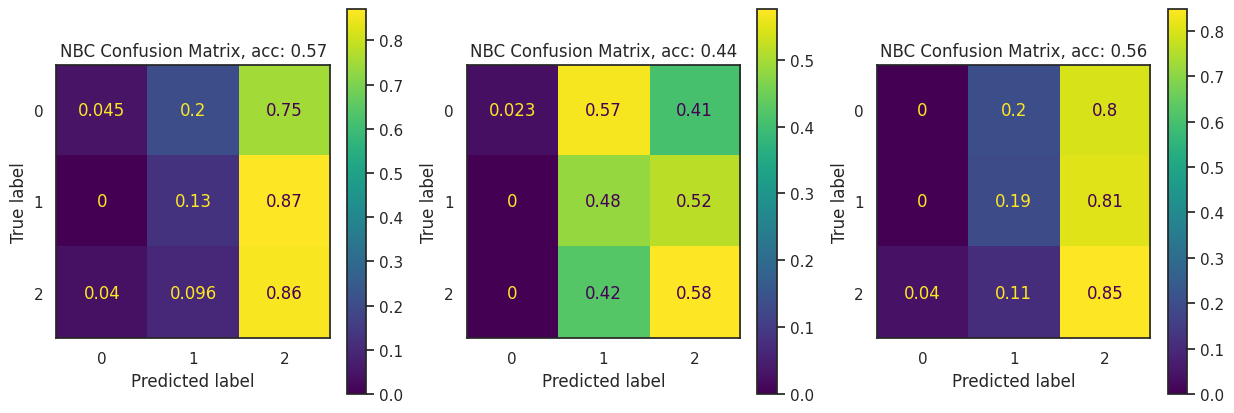

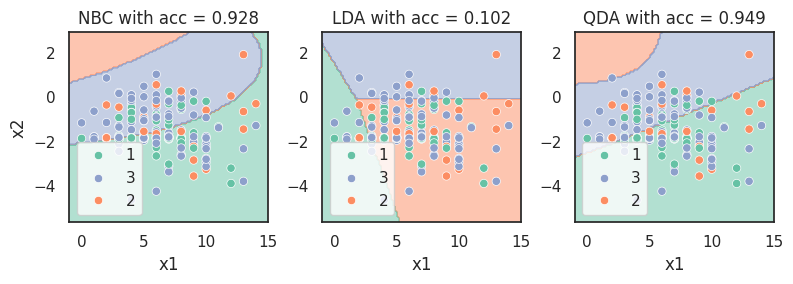

In [ ]:
# Practice Imbalance Data

sns.set(style="white")
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score

#### Practice

# Train Model with Imbalance Dataset
## NBC
nbc1=GaussianNB()  # Initiate the model
nbc1.fit(X_train_nbc, y_train_nbc)
y_hat_nbc1=nbc1.predict(X_test_nbc)
## LDA
lda1=LDA() # Initiate the model
lda1.fit(X_train_nbc, y_train_nbc)
y_hat_lda1=lda1.predict(X_test_nbc)
## QDA
qda1=QDA() # Initiate the model
qda1.fit(X_train_nbc, y_train_nbc)
y_hat_qda1=qda1.predict(X_test_nbc)


# Build Model is to capture the trend of Train Data, so the model is trying to base on Train Data. but When evaluate the Model, we use Test Data to judge the Model Performance


"""
In NBC we fit model using calculation of Density of each class 'Y'. If the high proportion lie to any 'Class', the model will judge that it is fall into that 'Class'
"""

# Evaluation Metrics
acc_nbc1=accuracy_score(y_test_nbc, y_hat_nbc1)
acc_lda1=accuracy_score(y_test_nbc, y_hat_lda1)
acc_qda1=accuracy_score(y_test_nbc, y_hat_qda1)

prec_nbc1=precision_score(y_test_nbc, y_hat_nbc1, average='macro')
prec_lda1=precision_score(y_test_nbc, y_hat_lda1, average='macro')
prec_qda1=precision_score(y_test_nbc, y_hat_qda1, average='macro')

"""
The difference between average = Micro & Macro is that
"""

rec_nbc1=recall_score(y_test_nbc, y_hat_nbc1, average='macro')
rec_lda1=recall_score(y_test_nbc, y_hat_lda1, average='macro')
rec_qda1=recall_score(y_test_nbc, y_hat_qda1, average='macro')

f1_nbc1=f1_score(y_test_nbc, y_hat_nbc1, average='macro')
f1_lda1=f1_score(y_test_nbc, y_hat_lda1, average='macro')
f1_qda1=f1_score(y_test_nbc, y_hat_qda1, average='macro')

# Confusion Matrix
cf_mat_nbc1=confusion_matrix(y_test_nbc, y_hat_nbc1, normalize='true')
cf_mat_lda1=confusion_matrix(y_test_nbc, y_hat_lda1, normalize='true')
cf_mat_qda1=confusion_matrix(y_test_nbc, y_hat_qda1, normalize='true')

ConfusionMatrixDisplay(cf_mat_nbc1).plot()
ConfusionMatrixDisplay(cf_mat_lda1).plot()
ConfusionMatrixDisplay(cf_mat_qda1).plot()

# Build Grid Display for Confusion Matrix
import matplotlib.pyplot as plt
fix, axn=plt.subplots(1,3, figsize=(15,5))

# NBC
ax=ConfusionMatrixDisplay(cf_mat_nbc1).plot(ax=axn[0])
axn[0].set_title(f"NBC Confusion Matrix, acc: {acc_nbc1}")

# LDA
ax=ConfusionMatrixDisplay(cf_mat_lda1).plot(ax=axn[1])
axn[1].set_title(f"NBC Confusion Matrix, acc: {acc_lda1}")

# QDA
ax=ConfusionMatrixDisplay(cf_mat_qda1).plot(ax=axn[2])
axn[2].set_title(f"NBC Confusion Matrix, acc: {acc_qda1}")
#plt.show()

# Value
import pandas as pd
df_value1 = pd.DataFrame({
    'Model': ['NBC', 'LDA', 'QDA'],
    'Recall': [rec_nbc1, rec_lda1, rec_qda1],
    'Precision': [prec_nbc1, prec_lda1, prec_qda1],
    'F1-Score': [f1_nbc1, f1_lda1, f1_qda1],
    'Accuracy': [acc_nbc1, acc_lda1, acc_qda1]
})

plot_decision_boundary(X_test_nbc, y_test_nbc, models=models, model_names=["NBC", "LDA", "QDA"])

In [ ]:
# Code for countplot
sns.countplot(x=y_nbc, hue=y_nbc, ax=axs[0], order=['1','2','3'], palette=palette) # need to explain this code==> this is to set the Scatterplot into Graph No. 1
# Need to decorate our scatterplot
for container in axes[0].containers:
    axs[0].bar_label(container)
axs[0].set_title("Distribution More Fit to NBC")
axs[0].set_xlabel("x1")
axs[0].set_ylabel("x2")



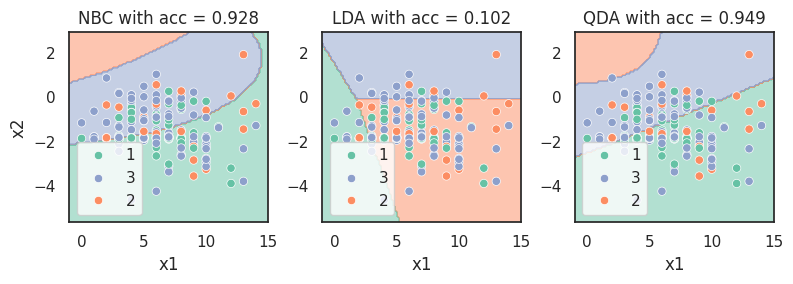

In [ ]:
plot_decision_boundary(X_test_nbc, y_test_nbc, models=models, model_names=["NBC", "LDA", "QDA"])

**c.** How does this result compare to the balanced case? Does this surprise you?

> Your opinion...

---------

**B.** Do the same (compute these matrices) for the other two imbalanced datasets: `lda` and `qda`.

In [ ]:
# To do

----------

**C.** In `NBC`, `LDA`, and `QDA`, all parameters (such as means and variances) are directly estimated using data. However, in `RDA`, we can tune the trade-off parameter $\alpha$ that combines the `QDA` covariance matrices with the `LDA` covariance matrix. This allows for a balance between the flexibility of `QDA` and the simplicity of `LDA`:

$$\hat{\Sigma}_k(\alpha)=\alpha\hat{\Sigma}_k+(1-\alpha)\hat{\Sigma}.$$

We are now searching for an optimal $\alpha^*$ that yields better or even the best scores (recall, precision and F$_1$-score). This can be achieved using [Cross-Validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#:~:text=Cross%2Dvalidation%20includes%20resampling%20and,model%20will%20perform%20in%20practice.){target="_blank"} technique. The steps we follow are:

**a.** First, let's fix $\alpha_0=0.5$, write a `python` function called `deltaRDA(X, y, X_test, alpha = 0.5, lda_cov = None, qda_cov = None, means = None)` where

- `X,y`: input-output training data
- `X_test`: an array containing testing inputs $x_i$ for computing $\delta(x)$.
- `alpha`: regularized strength (be default is $0.5$).
- `lda_cov`: common covariance in `LDA` ($\hat{\Sigma}$). It should be estimated using data `(X,y)` if it's `None`.
- `qda_cov`: list of per-class covariances in `QDA` ($\hat{\Sigma}_k$). It should be estimated using data.  
- `means`: list of per-class means. It should also be estimated if it's `None`. <br>

^[This may be the most difficult question.]This function computes the prediction of `X_test` using `RDA` at regularized value $\alpha_0$. Hint: using the implementation on [slide 37](https://hassothea.github.io/Advanced-Machine-Learning-ITC/courses/Intro_NBC_LDA_QDA.html#/implementation-of-qda){target="_blank"}.

In [ ]:
def deltaRDA(X, y, X_test, alpha = 0.5, lda_cov = None, qda_cov = None, means = None):
    # To do
    pass

**b.** Compute the confusion matrix and all the performance matrices on the test data using `deltaRDA` at $\alpha=0.5$ as defined above.

In [ ]:
# To do

**Remark question:** What do you think about the results of `RDA` compared to the previous results from `NBC`, `LDA`, and `QDA`? Remember, we initially chose $\alpha_0=0.5$. Now, let’s find the optimal value of $\alpha$.

> Your response:



--------------

**c.** Split your training data into $K$ folds namely: $F_1,F_2,\dots,F_K$. Let $F_{-k}$ represent all the training data except for the $k$th fold. For any fixed $\alpha$, write a function `cvRDA(alpha)` that returns the average F$_1$-score over each fold $F_k$ using model built on $F_{-k}$. One way to do this is shown below.

In [ ]:
K = 5          # choose K = 5
np.random.seed(42)
rand_id = np.random.choice(range(K), replace=True, size=500) # Shuffle index
X_train = X_nbc[:500,:]
y_train = y_nbc[:500]
X_test = X_nbc[500:,:]
y_test = y_nbc[500:]

def cvRDA(alpha):
    res = []
    for k in range(K):
        y_hat = deltaRDA(X=X_train[rand_id != k,:],
                         y=y_train[rand_id != k],
                         X_test=X_train[rand_id == k,:],
                         alpha=alpha)
        res.append(f1_score(y_train[rand_id == k], y_hat, average="macro"))
    return np.mean(res).round(3)

print(f"* Cross-validation F1-score for alpha = 0.5: {cvRDA(0.5)}")

---

**d.** Choose a grid for $\alpha$, for example, `G=np.linspace(0,1,100)` which generates uniform grid of $100$ values on interval $[0,1]$. Now, write `Python` code that searches for $\alpha^*$ on the grid $G$ with largest cross-validation F$_1$-score. Plot the the following graph of $(x,y)=(\alpha, \text{CVError}(\alpha))$.

In [ ]:
G = np.linspace(0,1,100)
cvError = [cvRDA(alpha) for alpha in G]

# To do

------

**e.** Build the `RDA` model with the observed optimal $\alpha^*$ using all $500$ training data points. Report the performance metrics on the testing data. Conclude your findings.

> You conclusion:


--------------

## **2. Real datasets**

> In this section, you will reproduce the results shown in the course with `Spam` dataset and explore the [Heart Disease Dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset). We can download `Spam` data using the code below:

In [ ]:
import pandas as pd
path_spam = "https://raw.githubusercontent.com/hassothea/MLcourses/refs/heads/main/data/spam.txt"
spam = pd.read_csv(path_spam, index_col=0, sep=" ")
spam.sample(5)

,make,address,all,num3d,our,over,remove,internet,order,mail,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
Id,,,,,,,,,,,,,,,,,,,,,
1361,0.08,0.08,0.76,0.0,0.85,1.02,0.25,0.17,0.59,0.08,...,0.000,0.065,0.0,0.403,0.117,0.013,7.484,669,1407,spam
520,0.31,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.114,0.000,0.0,0.057,0.000,0.000,2.972,18,110,spam
3263,0.22,0.00,0.07,0.0,0.07,0.07,0.00,0.14,0.00,0.36,...,0.041,0.031,0.0,0.031,0.000,0.000,1.912,22,568,nonspam
2735,0.04,0.09,0.31,0.0,0.04,0.22,0.04,0.00,0.00,0.58,...,0.013,0.224,0.0,0.027,0.006,0.000,1.784,29,1192,nonspam
153,0.67,0.00,0.67,0.0,2.70,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.200,0.000,0.000,1.064,3,33,spam


**A.** Perform descriptive analysis on the datasets: aim for connection between inputs and the target.

**B.** Split and built model based on your analysis in the previous step.

**C.** Report the results on the testing data.

-------------------